In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder



In [2]:
# load dataset into Pandas DataFrame
df = pd.read_csv("Dataset/Iris.csv", names=['sepal length','sepal width','petal length','petal width','target'])
df.head(5)

,sepal length,sepal width,petal length,petal width,target
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']# Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['target']].values# Standardizing the features
le = LabelEncoder()
y = le.fit_transform(y)
y
#x = StandardScaler().fit_transform(x)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(x)

In [5]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, train_size = 0.7)

#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred_test =  clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred_test)*100)



Accuracy Score on test data:  88.88888888888889


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf




,principal component 1,principal component 2,principal component 3
0,-0.630361,0.111556,-0.016993
1,-0.623546,-0.100313,-0.047120
2,-0.669793,-0.047220,0.021648
3,-0.654633,-0.098791,0.025214
4,-0.648263,0.137558,0.016813
...,...,...,...
145,0.551755,0.058990,0.085968
146,0.406278,-0.172227,-0.003916
147,0.447293,0.036996,0.049336
148,0.489218,0.149121,0.238719


In [8]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,target
0,-0.630361,0.111556,-0.016993,NaN
1,-0.623546,-0.100313,-0.047120,Iris-setosa
2,-0.669793,-0.047220,0.021648,Iris-setosa
3,-0.654633,-0.098791,0.025214,Iris-setosa
4,-0.648263,0.137558,0.016813,Iris-setosa
...,...,...,...,...
146,0.406278,-0.172227,-0.003916,Iris-virginica
147,0.447293,0.036996,0.049336,Iris-virginica
148,0.489218,0.149121,0.238719,Iris-virginica
149,0.312079,-0.031151,0.118672,Iris-virginica


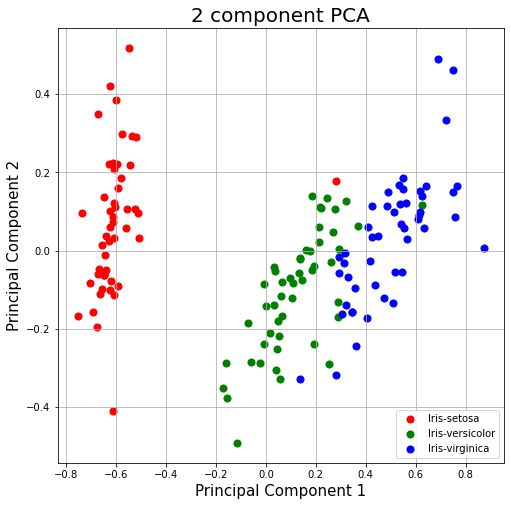

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Split the data after PCA

In [10]:


#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state = 20, train_size = 0.7)



Decision Tree After PCA

In [11]:
#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred_test =  clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred_test)*100)



Accuracy Score on test data:  91.11111111111111


KNN After PCA

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train,y_train)

#Predicting labels on the test set.
y_pred_test =  knn_pca.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy Score on test data: ', accuracy_score(y_test, y_pred_test)*100)


Accuracy Score on test data:  91.11111111111111


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


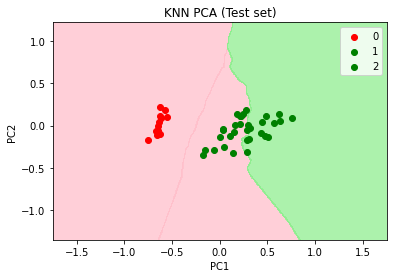

In [13]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()